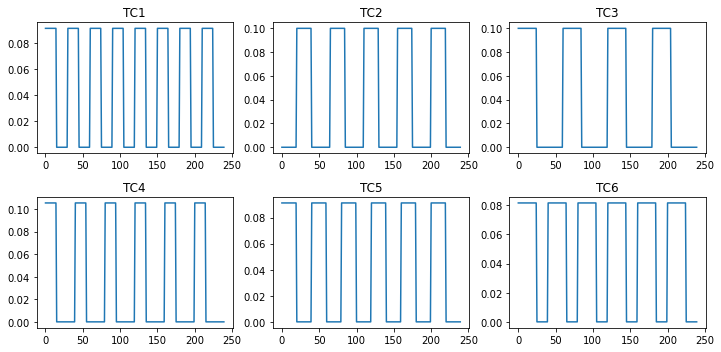

In [7]:
## Question 1(a)
## WRITE THESE INTO FUNCTIONS!!

import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

av = [0, 20, 0, 0, 0, 0]
iv = [30, 45, 60, 40, 40, 40]
ones = [15, 20, 25, 15, 20, 25]
n = 240
v = 441
nsrcs = 6

temporal_sources = []
temporal_sources_normalised = []
temporal_sources_standardised = []
for i in range(nsrcs):
    arrival = np.zeros(av[i])
    after_arrival = np.resize(np.concatenate((np.ones(ones[i]), 
                                                    np.zeros(iv[i]-ones[i]))),
                              n - av[i])
    this_tc = np.concatenate((arrival, after_arrival))
    tc_mean = np.mean(this_tc)
    tc_norm = np.linalg.norm(this_tc)
    tc_std = np.std(this_tc)
    temporal_sources_normalised.append(this_tc/tc_norm)
    #this_tc = this_tc - tc_mean
    #this_tc_normalised = this_tc/np.linalg.norm(this_tc)
    #this_tc_normalised = this_tc/tc_norm
    this_tc_standardised = (this_tc - tc_mean)/tc_std
    
    temporal_sources.append(this_tc)
    #temporal_sources_normalised.append(this_tc_normalised)
    temporal_sources_standardised.append(this_tc_standardised)


fig, ax = plt.subplots(2, 3, figsize = (10, 5))
for i in range(3):
    ax[0,i].plot(temporal_sources_normalised[i])
    ax[1,i].plot(temporal_sources_normalised[i + 3])
    ax[0,i].set_title("TC" + str(i+1))
    ax[1,i].set_title("TC" + str(i+4))
plt.tight_layout()
    
plt.savefig('Source_TCs.png')

#fig4.savefig('tc1')

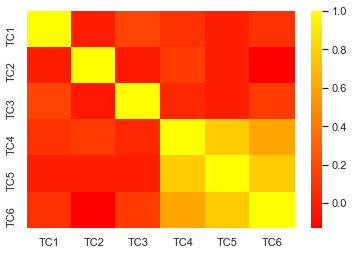

In [80]:
#temporal_matrix1 = np.matrix(temporal_sources)
temporal_numpy = np.vstack(temporal_sources_standardised)
temporal_numpy = np.transpose(temporal_numpy)


sns.set()
sns.heatmap(pd.DataFrame(temporal_numpy).corr(), cmap = 'autumn',
            xticklabels = ('TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6'),
           yticklabels = ('TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6'))
plt.show()
# use this matrix instead fo the np array above if you need!
##temporal_matrix = np.matrix(temporal_sources)
##temporal_matrix = np.transpose(temporal_matrix)
##sns.set()
##fig3, ax3 = plt.subplots()
##sns.heatmap(pd.DataFrame(temporal_matrix1).corr())
##fig3.savefig('matrix')


From the output, the two highly correlated TCs are TC4 and TC5

Question 1.3

[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


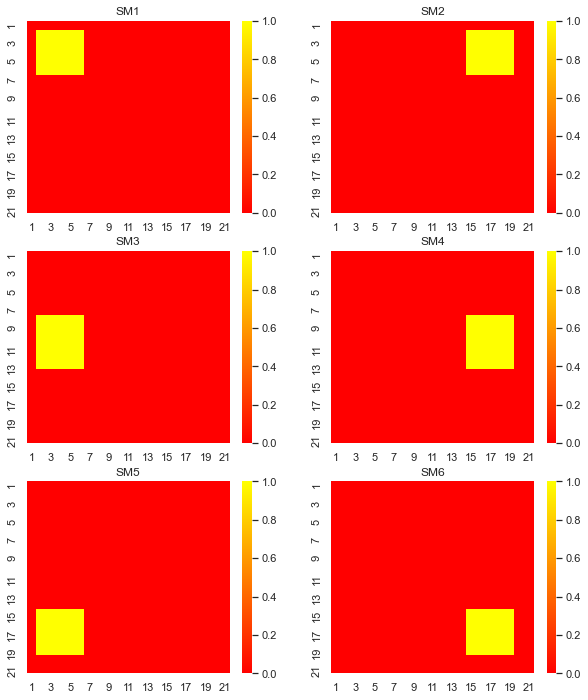

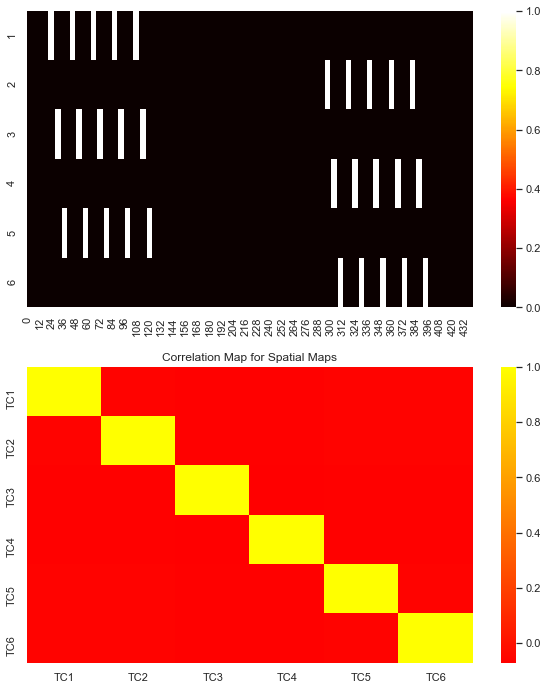

In [72]:
tmpSM = np.zeros((6, 21, 21), dtype = int)
# Each index is -1 than the given index in the specification, since Python 
# starts indexing at 0, not 1
tmpSM_vertical_start = [1, 1, 7, 7, 14, 14]
tmpSM_vertical_end = [5, 5, 12, 12, 18, 18]
tmpSM_horizontal_start = [1, 14, 1, 14, 1, 14]
tmpSM_horizontal_end = [5, 18, 5, 18, 5, 18]

for i in range(nsrcs):
    tmpSM[i, tmpSM_vertical_start[i]:tmpSM_vertical_end[i]+1, 
            tmpSM_horizontal_start[i]:tmpSM_horizontal_end[i]+1] = 1

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 12))
SM_column_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
                        '12', '13', '14', '15', '16', '17', '18', '19', '20',
                        '21']

for i in range(nsrcs):
    tmpSM_df = pd.DataFrame(tmpSM[i])
    tmpSM_df.index = tmpSM_df.index + 1
    tmpSM_df.columns =  SM_column_names
    sns.heatmap(pd.DataFrame(tmpSM_df), cmap = 'autumn', ax = axes.flat[i])
    axes.flat[i].set_title("SM" + str(i+1))

#print(tmpSM[2])
for i in range(nsrcs):
    tmpSM[i] = np.transpose(tmpSM[i])
#print(tmpSM)

SM = np.reshape(tmpSM, (6, 441))
SM_df = pd.DataFrame(SM)
SM_df.index = SM_df.index + 1
print(SM[2, 28:50])

SM_T = np.transpose(SM)
fig2, axes2 = plt.subplots(2, 1, figsize = (10, 12))
#sns.set()


sns.heatmap(SM_df, cmap = 'hot', ax = axes2[0])

sns.heatmap(SM_df.transpose().corr(), cmap = 'autumn',
            xticklabels = ('TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6'),
           yticklabels = ('TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6'), ax = axes2[1])
axes2[1].set_title("Correlation Map for Spatial Maps")
plt.show()

# should be 295 0s before a 1

Hence, the 6 SMs are independent, since the correlation map (CM) above shows no correlation between any of them. Further - **say why we don't have to standardize!!**

/Users/gabbimackechnie/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gabbimackechnie/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


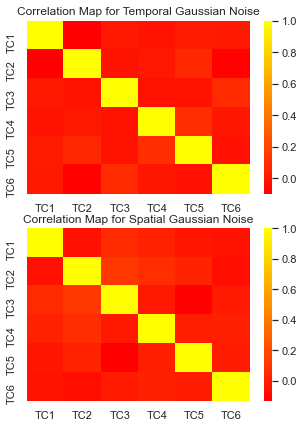

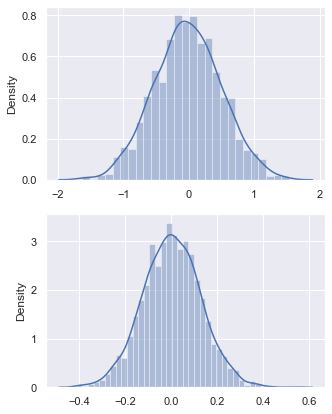

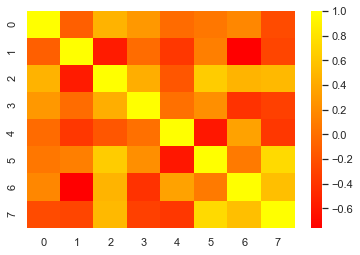

In [73]:
from math import sqrt

temporal_mean = 0
spatial_mean = 0

temporal_variance = 0.25
spatial_variance = 0.015

def generate_temporal_noise(mean, variance):
    TC_noise = np.random.normal(mean, sqrt(variance), size = (240, 6))
    return TC_noise

def generate_spatial_noise(mean, variance):
    SM_noise = np.random.normal(mean, sqrt(variance), size = (6, 441))
    return SM_noise

# Generate some noise
temporal_noise = generate_temporal_noise(temporal_mean, temporal_variance)
spatial_noise = generate_spatial_noise(spatial_mean, spatial_variance)

# Generate Correlation Maps for each
fig, axes = plt.subplots(2, 1, figsize = (5, 7))
#sns.set()
sns.heatmap(pd.DataFrame(temporal_noise).corr(), cmap = 'autumn',
            xticklabels = ('TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6'),
           yticklabels = ('TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6'),
            ax = axes[0])
axes.flat[0].set_title("Correlation Map for Temporal Gaussian Noise")

spatial_noise_T = np.transpose(spatial_noise)
sns.heatmap(pd.DataFrame(spatial_noise_T).corr(), cmap = 'autumn',
            xticklabels = ('TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6'),
           yticklabels = ('TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6'),
            ax = axes[1])
axes.flat[1].set_title("Correlation Map for Spatial Gaussian Noise")

# Plot the histograms of each
fig2, axes2 = plt.subplots(2, 1, figsize = (5, 7))
sns.distplot(temporal_noise, ax = axes2[0])
sns.distplot(spatial_noise, ax = axes2[1])

# Calculating the matrix product of temporal and spatial noise, and looking for 
# correlation.
product = np.matmul(temporal_noise, spatial_noise)
fig3, axes3 = plt.subplots()
sns.heatmap(pd.DataFrame(product).corr().iloc[0:8, 0:8], cmap = 'autumn')
plt.show()

From the histograms, both temporal and spatial noise have a normal distribution, with both displaying a mean of 0 (since the histogram is centred around 0) - **need to talk about if they fit their variance**. 
From the correlation matrix, the product of the temporal and spatial noise is correlated across 8 variables as shown, so can be assumed to be correlated across V = 441 variables.

Question 1.5

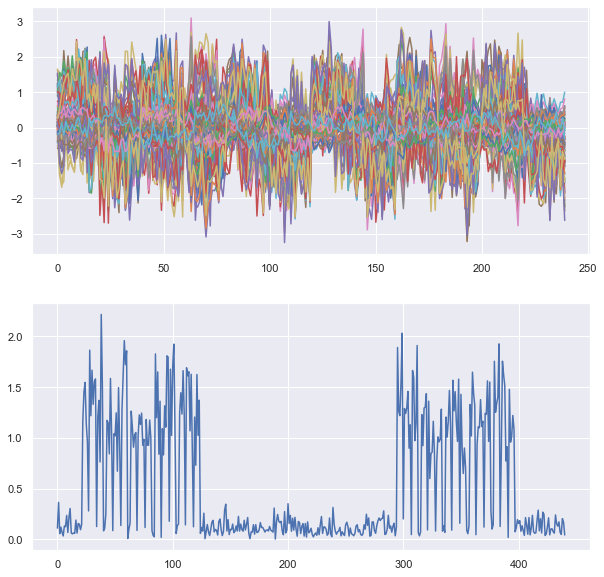

In [81]:
from sklearn.preprocessing import StandardScaler
import statistics

def generate_X(TC, TC_noise, SM, SM_noise):
    #first_term = np.add(TC, TC_noise)
    #second_term = np.add(SM, SM_noise)
    #X = np.matmul(m, second_term)
    X = np.matmul(np.add(TC, TC_noise), np.add(SM, SM_noise))
    return X

# Generate X
X = generate_X(temporal_numpy, temporal_noise, SM, spatial_noise)
X_df = pd.DataFrame(X)

# Plotting 100 randomly selected time-series (variables) from X
X_random = X_df.sample(n = 100, axis = 'columns')
fig, ax = plt.subplots(2, 1, figsize = (10, 10))
ax[0].plot(range(n), X_random)
#plt.show()

# Plotting the variance of all 441 variables
num_variables = 441
ax[1].plot(range(num_variables), X.var(axis = 0))

# don't use standard scaler! replace this with making an empty array to fill
# the standardisation at the bottom with
#X_df_scaled = pd.DataFrame(StandardScaler().fit_transform(X_df))
empty_X = np.zeros((n, v))

def scale_X(X, prefilled_scaled):
    for i in range(441):
        this_norm = np.linalg.norm(X[:,i])
        this_mean = np.mean(X[:,i], axis = 0)
        #print(this_mean)
        #print(X[:,i].mean)
        this_std = np.std(X[:,i], axis = 0)
        #print(this_std)
        #print(prefilled_scaled[:,i])
        prefilled_scaled[:,i] = (X[:,i] - this_mean)/this_std
        #print(prefilled_scaled[:,i])
        #prefilled_scaled[:,i] = X[:,i]/this_std
    return prefilled_scaled
        

X_scaled_np = scale_X(X, empty_X)




***You need to explain why you can't keep temporal_numpy * spatial_noise and SM * temporal_noise***

***Also need to explain what information the variance plot gives***

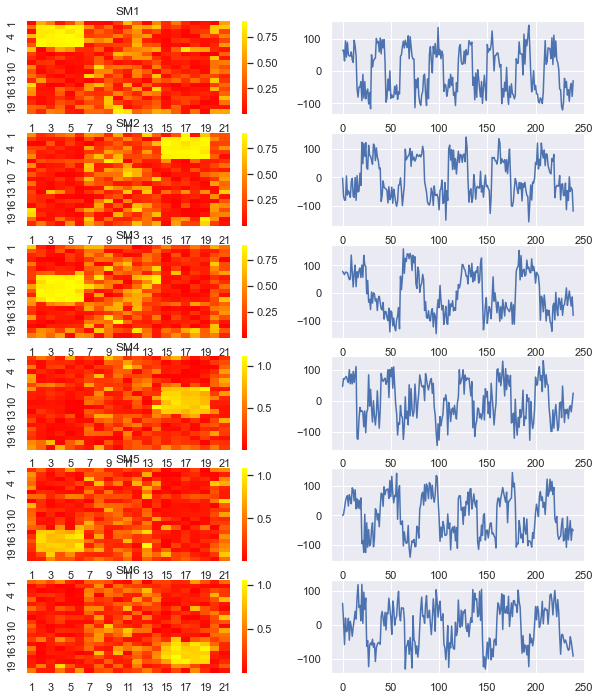

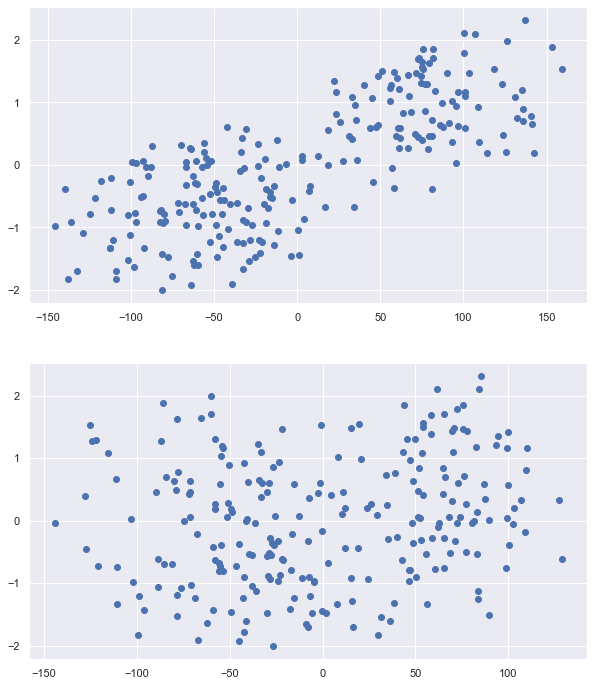

In [82]:
## Retrieval of SMs
A_LSR_term1 = np.linalg.inv(np.matmul(np.transpose(temporal_numpy), temporal_numpy))
A_LSR = np.matmul(A_LSR_term1, 
                  (np.matmul(np.transpose(temporal_numpy), X_scaled_np)))

D_LSR = np.matmul(X_scaled_np, np.transpose(A_LSR))

A_LSR = np.abs(A_LSR)

A_LSR_reshape = np.reshape(A_LSR, (6, 21, 21))
for i in range(nsrcs):
    A_LSR_reshape[i] = np.transpose(A_LSR_reshape[i])

fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (10, 12))
for i in range(nsrcs):
    #this_A_LSR = np.reshape(A_LSR[i], (21, 21))
    #this_A_LSR = np.transpose(this_A_LSR)
    #print(thi"s_A_LSR)
    A_LSR_df = pd.DataFrame(A_LSR_reshape[i], columns = SM_column_names)
    #A_LSR_df = A_LSR_df.transpose()
    A_LSR_df.index = A_LSR_df.index + 1
    sns.heatmap(A_LSR_df, cmap = 'autumn', ax = axes[i,0])
    axes[i,0].set_title("SM" + str(i+1))
    axes[i,1].plot(range(n), D_LSR[:,i])
    
plt.show()

fig2, axes2 = plt.subplots(2, 1, figsize = (10, 12))

axes2[0].scatter(D_LSR[:,2], X_scaled_np[:,29])
axes2[1].scatter(D_LSR[:,3], X_scaled_np[:,29])

plt.show()




Question 2.2

5.123906049583622
5.345504497325616


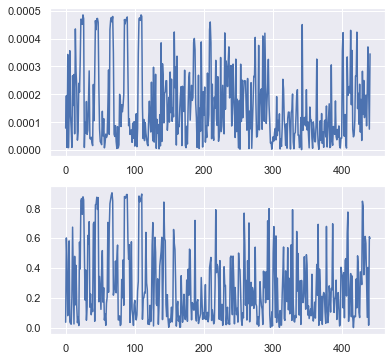

In [83]:
#from sklearn.metrics import mean_squared_error

"""lambda_A_mse = []
lambda_D_mse = []
for i in np.arange(0, 1, 0.1):
    A_RR_first = np.linalg.inv(np.add(np.matmul(np.transpose(temporal_numpy), 
                                            temporal_numpy),
                                  (i * v) * np.identity(6)))
    A_RR = np.matmul(A_RR_first, np.matmul(np.transpose(temporal_numpy), 
                                       X_scaled_np))
    lambda_A_mse.append(mean_squared_error(SM, A_RR))
    
    D_RR = np.matmul(X_scaled_np, np.transpose(A_RR))
    lambda_D_mse.append(mean_squared_error(temporal_numpy, D_RR))

fig, axes = plt.subplots(2, 1, figsize = (10, 12))
axes[0].plot(np.arange(0, 1, 0.1), lambda_A_mse)
axes[1].plot(np.arange(0, 1, 0.1), lambda_D_mse)
plt.show()"""

# Hence, from the plot, a value of lambda closer to 1 is better, since this
# reduces the mean square error

lambda_est = 0.9
lambda_tilde = lambda_est * v
A_RR_first = np.linalg.inv(np.add(np.matmul(np.transpose(temporal_numpy), 
                                            temporal_numpy),
                                  lambda_tilde * np.identity(6)))

A_RR = np.matmul(A_RR_first, np.matmul(np.transpose(temporal_numpy), 
                                       X_scaled_np))

D_RR = np.matmul(X_scaled_np, np.transpose(A_RR))

corr_TLSR = np.zeros((nsrcs, nsrcs))
corr_TRR = np.zeros((nsrcs, nsrcs))
for i in range(nsrcs):
    for j in range(nsrcs):
        corr_TLSR[i,j] = pd.Series(temporal_numpy[:,i]).corr(pd.Series(D_LSR[:,j]))
        corr_TRR[i,j] = pd.Series(temporal_numpy[:,i]).corr(pd.Series(D_RR[:,j]))
        
# Retain only the maximum absolute correlations
corr_TLSR  = np.absolute(corr_TLSR)
c_TLSR = [np.max(row) for row in corr_TLSR]
corr_TRR  = np.absolute(corr_TRR)
c_TRR = [max(row) for row in corr_TRR]

#C_TRR = pd.DataFrame(temporal_numpy).corrwith(pd.DataFrame(D_RR), axis = 0)

# Calculating the sum of each
sum_TLSR = sum(c_TLSR)
sum_TRR = sum(c_TRR)

print(sum_TLSR)
print(sum_TRR)

# plotting theâ€€first vector from ARR and the corresponding vector from ALSR,
# with lambda = 1000
lambda_est = 1000
lambda_tilde = lambda_est * v

A_RR_first = np.linalg.inv(np.add(np.matmul(np.transpose(temporal_numpy), 
                                            temporal_numpy),
                                  lambda_tilde * np.identity(6)))

A_RR = np.abs(np.matmul(A_RR_first, np.matmul(np.transpose(temporal_numpy), 
                                       X_scaled_np)))

fig2, axes2 = plt.subplots(2, 1, figsize = (6, 6))

axes2[0].plot(range(num_variables), A_RR[0])
axes2[1].plot(range(num_variables), A_LSR[0])

#axes2.plot(A_RR[0])
#A_RR_reshape = A_RR.reshape(6, 21, 21)
#for i in range(nsrcs):
#    A_RR_reshape[i] = np.transpose(A_RR_reshape[i])


#sns.heatmap(A_RR_reshape[0], cmap = 'autumn', ax = axes2[0])
#sns.heatmap(A_LSR_reshape[1], cmap = 'autumn', ax = axes2[1])
#plt.show()


From the plot for the first vector of ARR, the values are shrunk to zero, sitting in the range (-0.002, 0.002), whereas the values in the first vector of A_LSR sit in a much wider range.

Question 2.3

10


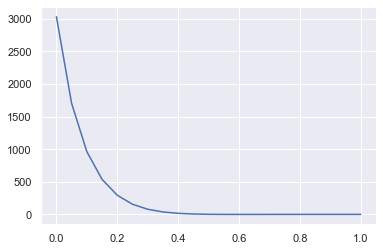

In [85]:
x1 = 21
x2 = 21
from sklearn.metrics import mean_squared_error

all_mses = []
for i in range(10):
    new_temporal_noise = generate_temporal_noise(temporal_mean, 
                                                 temporal_variance)
    new_spatial_noise = generate_spatial_noise(spatial_mean, spatial_variance)
    X = generate_X(temporal_numpy, new_temporal_noise, SM, new_spatial_noise)
    empty_X = np.zeros((n, v))
    new_scaled_X = scale_X(X, empty_X)
    
    realisation_mses = []
    for rho in np.arange(0.0, 1.05, 0.05):
        # need to check that you should actually square this??
        #np.max(np.sum(np.abs(a), axis=0))
        
        # using square of frobenius norm in the step calculation
        step = 1/((np.linalg.norm(np.matmul(temporal_numpy,
                                           np.transpose(temporal_numpy)), ord = 1)) * 1.1)
        thr = rho * n * step
        Ao = np.zeros((nsrcs))
        A = np.zeros((nsrcs))
        Alr = np.zeros((nsrcs, x1 * x2))
        for k in range(x1 * x2):
            # starting A (this one) is the same regardless of rho
            A = Ao + (step * np.matmul(np.transpose(temporal_numpy), 
                                      (new_scaled_X[:,k] - 
                                       np.matmul(temporal_numpy, Ao))))
            A = (1/(1 + thr)) * np.multiply(np.sign(A),
                                            np.maximum(np.zeros(A.shape), 
                                                       np.abs(A) - thr))
            for i in range(10):
                Ao = A
                A = Ao + (step * np.matmul(np.transpose(temporal_numpy), (new_scaled_X[:,k] - 
                                           np.matmul(temporal_numpy, Ao))))
                A = (1/(1 + thr)) * np.multiply(np.sign(A),
                                        np.maximum(np.zeros(A.shape), np.abs(A) - thr))
            Alr[:,k] = A
    
        Dlr = np.matmul(new_scaled_X, np.transpose(Alr))
        #print(np.mukt
        #this_mse = sum(sum(np.square(new_scaled_X - np.matmul(Dlr, Alr))))/(n * v)
        #this_mse = np.square(np.linalg.norm((new_scaled_X - np.matmul(Dlr, Alr)), 'fro'))/(n * v)
        this_mse = (sum(sum((new_scaled_X - np.matmul(Dlr, Alr))**2)))/(n * v)
        #this_mse = mean_squared_error(new_scaled_X, np.matmul(Dlr, Alr))
        #print(this_mse)
        realisation_mses.append(this_mse)
    all_mses.append(realisation_mses)
    

    
    #sum_of_mse = sum((np.linalg.norm(X_scaled_np - np.matmul(D_LR, A_LR)))**2
print(len(all_mses))

average_mses = (np.array(all_mses)).mean(axis = 0)
    
fig, axes = plt.subplots() #figsize = (10, 12)
axes.plot(np.arange(0.0, 1.05, 0.05), average_mses)
#axes[1].plot(np.arange(0, 1, 0.1), lambda_D_mse)
plt.show()

0.4472046775138286
[0.8909092666755856, 0.8809549945840653, 0.8911558311664829, 0.8901652545459168, 0.9161208947380823, 0.9012590301793659]
sum(C_TRR) =  5.345504497325616
sum(C_TLR) =  5.370565271889499
sum(C_SRR) =  3.047791205318188
sum(C_SLR) =  5.030200725791214


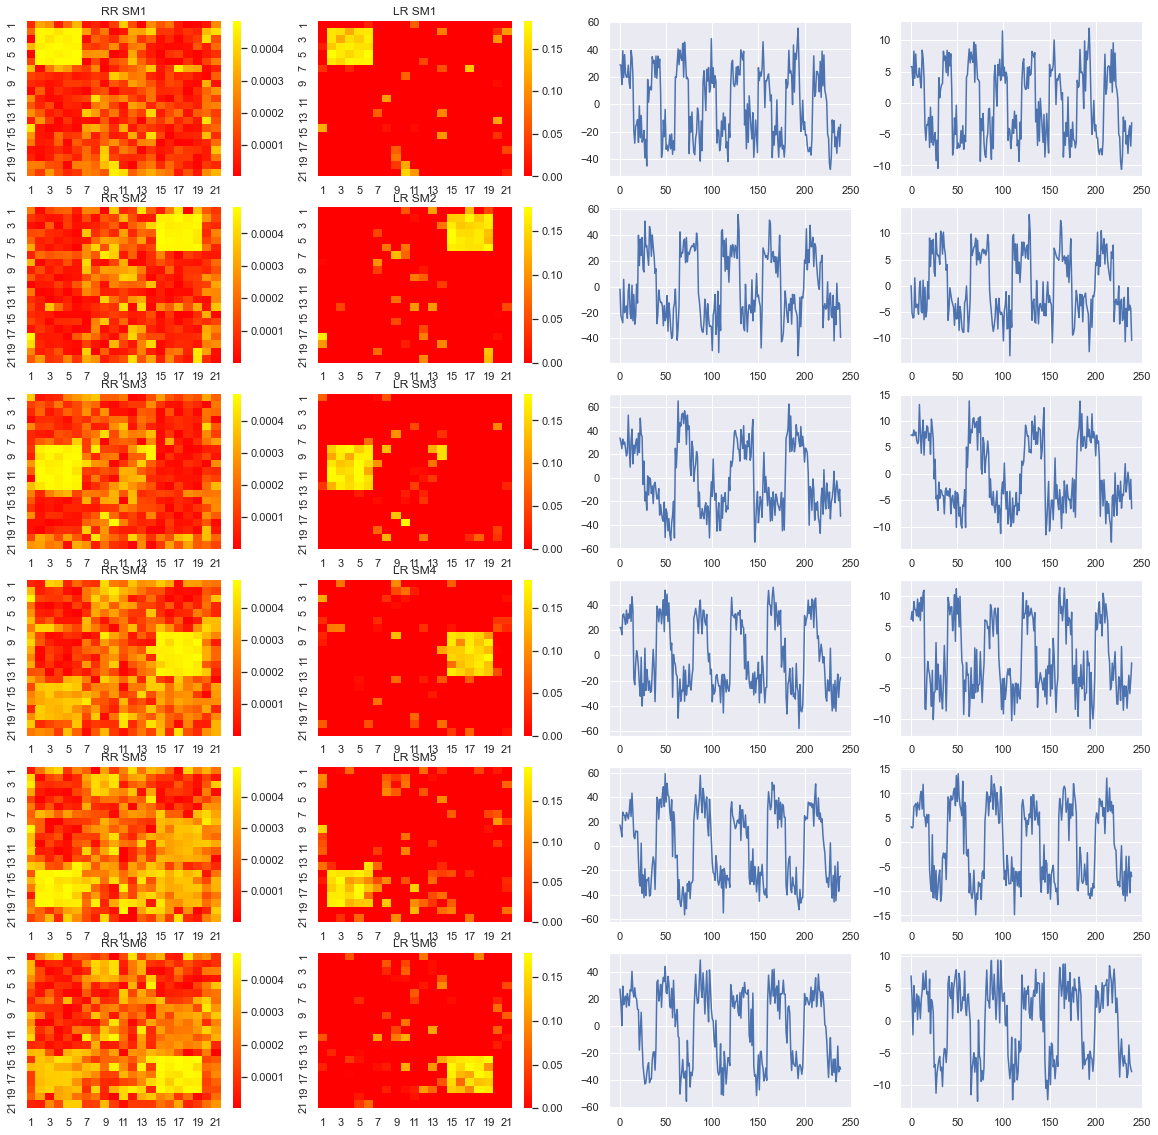

In [86]:
# we choose the value of rho to be 0.15

# Estimating the parameters gives
new_temporal_noise = generate_temporal_noise(temporal_mean, temporal_variance)
new_spatial_noise = generate_spatial_noise(spatial_mean, spatial_variance)
X = generate_X(temporal_numpy, new_temporal_noise, SM, new_spatial_noise)
empty_X = np.zeros((n, v))
new_scaled_X = X_scaled_np

rho = 0.6
# using square of frobenius norm in the step calculation
step = 1/((np.linalg.norm(np.matmul(temporal_numpy,
                                           np.transpose(temporal_numpy)), ord = 1)) * 1.1)
thr = rho * n * step
Ao = np.zeros((nsrcs))
A = np.zeros((nsrcs))
        
Alr = np.zeros((nsrcs, x1 * x2))
for k in range(x1 * x2):
    # starting A (this one) is the same regardless of rho
    A = Ao + (step * np.matmul(np.transpose(temporal_numpy), 
                                      (new_scaled_X[:,k] - 
                                       np.matmul(temporal_numpy, Ao))))
    A = (1/(1 + thr)) * np.multiply(np.sign(A),
                                 np.maximum(np.zeros(A.shape), np.abs(A) - thr))
                                            #np.full(A.shape, thr)))
    for i in range(10):
        Ao = A
        A = Ao + (step * np.matmul(np.transpose(temporal_numpy), (new_scaled_X[:,k] - 
                                           np.matmul(temporal_numpy, Ao))))
        A = (1/(1 + thr)) * np.multiply(np.sign(A),
                                        np.maximum(np.zeros(A.shape), np.abs(A) - thr))
    Alr[:,k] = A
Dlr = np.matmul(new_scaled_X, np.transpose(Alr))

this_mse = (sum(sum((new_scaled_X - np.matmul(Dlr, Alr))**2)))/(n * v)
print(this_mse)
# Find the correlation between each column in TC and each column in DRR, each
# column of SM and each column of ARR, each column of TC and each column of 
# DLR and each column of SM and each column of ALR

corr_TRR = np.zeros((nsrcs, nsrcs))
corr_SRR = np.zeros((nsrcs, nsrcs))
corr_TLR = np.zeros((nsrcs, nsrcs))
corr_SLR = np.zeros((nsrcs, nsrcs))

for i in range(nsrcs):
    for j in range(nsrcs):
        corr_TRR[i,j] = pd.Series(temporal_numpy[:,i]).corr(pd.Series(D_RR[:,j]))
        corr_SRR[i,j] = pd.Series(SM[i,:]).corr(pd.Series(A_RR[j,:]))
        
        corr_TLR[i,j] = pd.Series(temporal_numpy[:,i]).corr(pd.Series(Dlr[:,j]))
        corr_SLR[i,j] = pd.Series(SM[i,:]).corr(pd.Series(Alr[j,:]))

# Retain only the maximum absolute correlations
corr_TRR  = np.absolute(corr_TRR)
c_TRR = [np.max(row) for row in corr_TRR]
corr_SRR  = np.absolute(corr_SRR)
c_SRR = [np.max(row) for row in corr_SRR]
corr_TLR  = np.absolute(corr_TLR)
c_TLR = [max(row) for row in corr_TLR]
corr_SLR  = np.absolute(corr_SLR)
c_SLR = [np.max(row) for row in corr_SLR]

print(c_TLR)

# Calculating the sum of each
sum_TRR = sum(c_TRR)
sum_SRR = sum(c_SRR)
sum_TLR = sum(c_TLR)
sum_SLR = sum(c_SLR)

print("sum(C_TRR) = ", sum_TRR)
print("sum(C_TLR) = ", sum_TLR)
print("sum(C_SRR) = ", sum_SRR)
print("sum(C_SLR) = ", sum_SLR)

fig, axes = plt.subplots(nrows = 6, ncols = 4, figsize = (20, 20))
SM_column_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
                        '12', '13', '14', '15', '16', '17', '18', '19', '20',
                        '21']

# Taking the absolute value for simplicity of plotting
A_RR = np.abs(A_RR)
A_LR = np.abs(Alr)

A_RR_reshape = np.reshape(A_RR, (6, 21, 21))
A_LR_reshape = np.reshape(A_LR, (6, 21, 21))

A_RR_transpose = np.zeros((nsrcs, 21, 21))
A_LR_transpose = np.zeros((nsrcs, 21, 21))
for i in range(nsrcs):
    A_RR_transpose[i] = np.transpose(A_RR_reshape[i])
    A_LR_transpose[i] = np.transpose(A_LR_reshape[i])
    
    A_RR_df = pd.DataFrame(A_RR_transpose[i], columns = SM_column_names)
    A_LR_df = pd.DataFrame(A_LR_transpose[i], columns = SM_column_names)
    
    A_RR_df.index = A_RR_df.index + 1
    A_LR_df.index = A_LR_df.index + 1
    
    sns.heatmap(A_RR_df, cmap = 'autumn', ax = axes[i,0])
    sns.heatmap(A_LR_df, cmap = 'autumn', ax = axes[i,1])
    
    axes[i,0].set_title("RR SM" + str(i+1))
    axes[i,1].set_title("LR SM" + str(i+1))
    
    axes[i,2].plot(range(n), D_RR[:,i])
    axes[i,3].plot(range(n), Dlr[:,i])
    
plt.show()
        

(240, 6)
(240, 6)
(240, 240)
(240,)


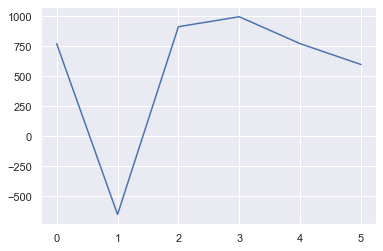

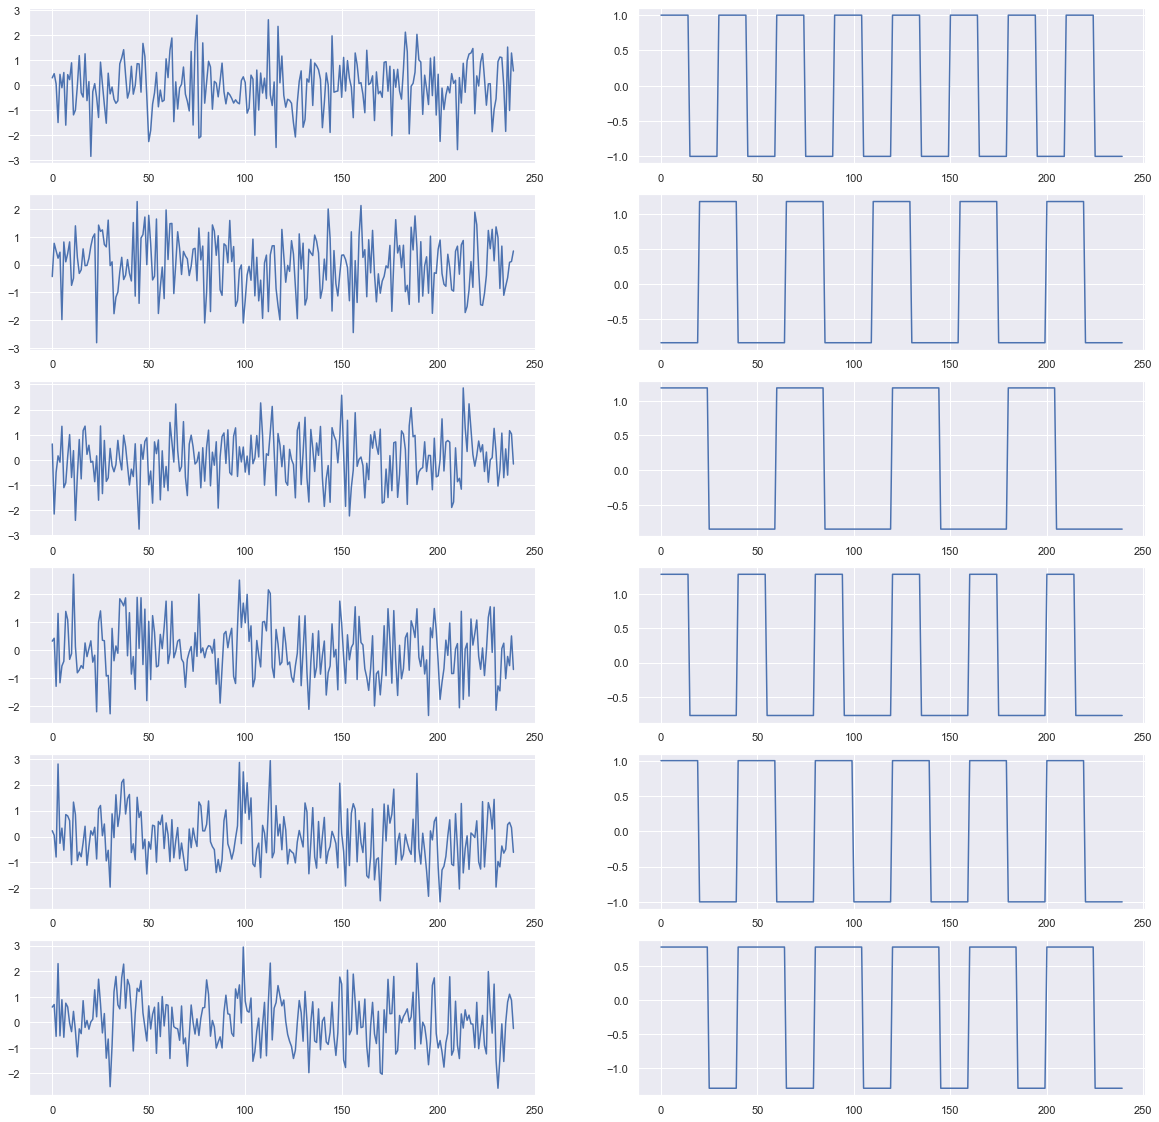

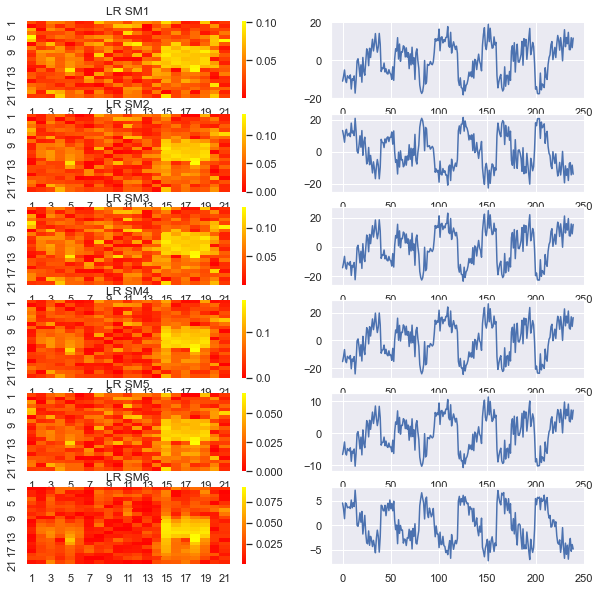

In [135]:
from numpy.linalg import svd 

U, V, W = svd(X_scaled_np, 6)
#U, V, W = svd(temporal_numpy)
# he r e d i g i t 5 po int s to the f a c t that we have only decomposed the data to f i r s t f i v e PCs
# U i s the e i g en ve c t o r o f XX' and i t i s where you obtain "Z" f o r your cas e
# W i s the e i g en ve c t o r o f X'X, V ar e the e i g en va lue s

Z = np.matmul(U, temporal_numpy)
#Z = U
eigenvalues = np.matmul(V, temporal_numpy)
#eigenvalues = V

print(Z.shape)
print(temporal_numpy.shape)
print(U.shape)
#print(W)
print(V.shape)

# plotting eigenvalues
fig, ax = plt.subplots()
ax.plot(eigenvalues)

# plotting the regressors in Z

fig2, ax2 = plt.subplots(6, 2, figsize = (20, 20))
for i in range(nsrcs):
    ax2[i,0].plot(range(n), Z[:,i])
    ax2[i,1].plot(range(n), temporal_numpy[:,i])

# lasso regression with rho = 0.001
rho = 0.001
step = 1/((np.linalg.norm(np.matmul(Z, np.transpose(Z)), ord = 1)) * 1.1)
thr = rho * n * step
Ao = np.zeros((nsrcs))
A = np.zeros((nsrcs))
        
Alr = np.zeros((nsrcs, x1 * x2))
for k in range(x1 * x2):
    # starting A (this one) is the same regardless of rho
    A = Ao + (step * np.matmul(np.transpose(Z), 
                                      (X_scaled_np[:,k] - 
                                       np.matmul(Z, Ao))))
    A = (1/(1 + thr)) * np.multiply(np.sign(A),
                                 np.maximum(np.zeros(A.shape), np.abs(A) - thr))
                                            #np.full(A.shape, thr)))
    for i in range(10):
        Ao = A
        A = Ao + (step * np.matmul(np.transpose(Z), (X_scaled_np[:,k] - 
                                           np.matmul(Z, Ao))))
        A = (1/(1 + thr)) * np.multiply(np.sign(A),
                                        np.maximum(np.zeros(A.shape), np.abs(A) - thr))
    Alr[:,k] = A
Dlr = np.matmul(X_scaled_np, np.transpose(Alr))

fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (10, 10))
SM_column_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
                        '12', '13', '14', '15', '16', '17', '18', '19', '20',
                        '21']

# Taking the absolute value for simplicity of plotting
A_LR = np.abs(Alr)

A_LR_reshape = np.reshape(A_LR, (6, 21, 21))

A_LR_transpose = np.zeros((nsrcs, 21, 21))
for i in range(nsrcs):
    A_LR_transpose[i] = np.transpose(A_LR_reshape[i])
    
    A_LR_df = pd.DataFrame(A_LR_transpose[i], columns = SM_column_names)
    
    A_LR_df.index = A_LR_df.index + 1
    
    sns.heatmap(A_LR_df, cmap = 'autumn', ax = axes[i,0])
    
    axes[i,0].set_title("LR SM" + str(i+1))
    
    axes[i,1].plot(range(n), Dlr[:,i])
    
plt.show()

In [217]:
print(np.sign([1, -5, 3, 4]))

[ 1 -1  1  1]


In [214]:
np.maximum([1, -4, 5], [-2, 9, 7])

array([1, 9, 7])

In [218]:
print(np.abs([-1, 5, -9]))

[1 5 9]


In [11]:
from numpy import savetxt

savetxt('X_scaled_np1.csv', X_scaled_np, delimiter = ',')
savetxt('temporal_numpy1.csv', temporal_numpy, delimiter = ',')

In [236]:
print(X_scaled_np[61, 79])
print(new_scaled_X[61, 79])

-1.3258215902516144
-1.3258215902516144


In [226]:
temporal_numpy[29, 2]

-0.8451542547285167

In [ ]:
print(Alr)